In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap

from scipy.stats import pearsonr, chi2
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact

from tqdm.autonotebook import tqdm

In [4]:
sc.set_figure_params(vector_friendly=True, dpi_save=300) 
sns.set_theme(style="white") 
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

In [5]:
adata_st = sc.read_h5ad("./Data/st.h5ad")

adata_st = sc.read_h5ad("/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/Data/st.h5ad")
adata_st.obs["imagerow"] = adata_st.obs["x"]
adata_st.obs["imagecol"] = adata_st.obs["y"]
adata_st.var.index = adata_st.var.features
adata_st.var_names_make_unique() 
adata_st.raw = adata_st

sc.pp.normalize_total(adata_st, target_sum=1e4)
sc.pp.log1p(adata_st)

layer = pd.read_csv("/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/Data/layer_manual_PDAC.csv",index_col=0)
adata_st.obs["Region"] = "NotAnno"
adata_st.obs.loc[layer.index,"Region"] = layer["Region"].values

In [6]:
celltypes = ["Acinar cells","Cancer clone A","Cancer clone B","Ductal antigen-presenting","Ductal centroacinar",
              "Ductal high hypoxic","Ductal terminal","Endocrine cells","Endothelial cells","Fibroblasts",
              "Macrophages A","Macrophages B","Mast cells","mDCs A","mDCs B",
              "Monocytes","pDCs","RBCs","T cells and NK cells","Tuft cells"]

In [7]:
SNGTM_prop = pd.read_csv("Results/SIGMOD/theta_logit.csv", index_col=0)
SNGTM_prop.index = adata_st.obs_names
SNGTM_prop.columns = [celltypes[i] for i in [0, 1, 2, 5, 4, 3] + 
                      list(range(6, 13)) + [15] + 
                      list(range(17, 20)) + 
                      [13, 14, 16]]

In [19]:
new_order = [
 'Acinar_cells', 'Cancer_clone_A', 'Cancer_clone_B', 'Ductal_MHC_Class_II',
 'Ductal_CRISP3_high-centroacinar_like', 'Ductal_APOL1_high-hypoxic',
 'Ductal_terminal_ductal_like', 'Endocrine_cells', 'Endothelial_cells',
 'Fibroblasts', 'Macrophages_A', 'Macrophages_B', 'Mast_cells', 'mDCs_A',
 'mDCs_B', 'Monocytes', 'pDCs', 'RBCs', 'T_cells_&_NK_cells', 'Tuft_cells'
]
tangram = pd.read_csv("/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/Results/Others/tangram.csv", index_col=0)
tangram = tangram.div(tangram.sum(axis=1), axis=0)
tangram.index =  adata_st.obs_names
tangram = tangram[new_order]
tangram.columns = celltypes

In [20]:
c2l = pd.read_csv("/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/Results/Others/c2l.csv", index_col=0)
c2l = c2l.div(c2l.sum(axis=1), axis=0)
c2l.index = adata_st.obs_names
c2l.columns = [celltypes[i] for i in [0, 1, 2, 5, 4, 3] + list(range(6, 13)) + [15] + list(range(17, 20)) + [13, 14, 16]]

In [21]:
card = pd.read_csv("/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/Results/Others/card.csv", index_col=0)
card.index = adata_st.obs_names
card.columns = celltypes

In [22]:
rctd = pd.read_csv("/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/Results/Others/RCTD.csv", index_col=0)
rctd.index = adata_st.obs_names
rctd.columns = [celltypes[i] for i in [0, 1, 2, 5, 4, 3] + list(range(6, 20))]

In [23]:
spotlight = pd.read_csv("/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/Results/Others/SPOTlight.csv", index_col=0)
spotlight.index = adata_st.obs_names
spotlight.columns = [celltypes[i] for i in [0, 1, 2, 5, 4, 3] + list(range(6, 20))]

In [24]:
spotiphy = pd.read_csv("/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/Results/Others/spotiphy.csv", index_col=0)
spotiphy.index = adata_st.obs_names
spotiphy.columns =[celltypes[i] for i in [0, 1, 2, 5, 4, 3] + list(range(6, 13)) + [15] + list(range(17, 20)) + [13, 14, 16]]

In [25]:
results = {
    "SIGMOD": SNGTM_prop[celltypes],
    "tangram": tangram[celltypes],
    "spotlight": spotlight[celltypes],
    "cell2location": c2l[celltypes],
    "CARD": card[celltypes],
    "RCTD": rctd[celltypes],
    "spotiphy": spotiphy[celltypes],
}

In [13]:
import sys
sys.path.append("..")

from SIGMOD import SIGMOD_plot as sigmod_plot

In [14]:
import importlib
importlib.reload(sigmod_plot)

<module 'SIGMOD.SIGMOD_plot' from '/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/../SIGMOD/SIGMOD_plot.py'>

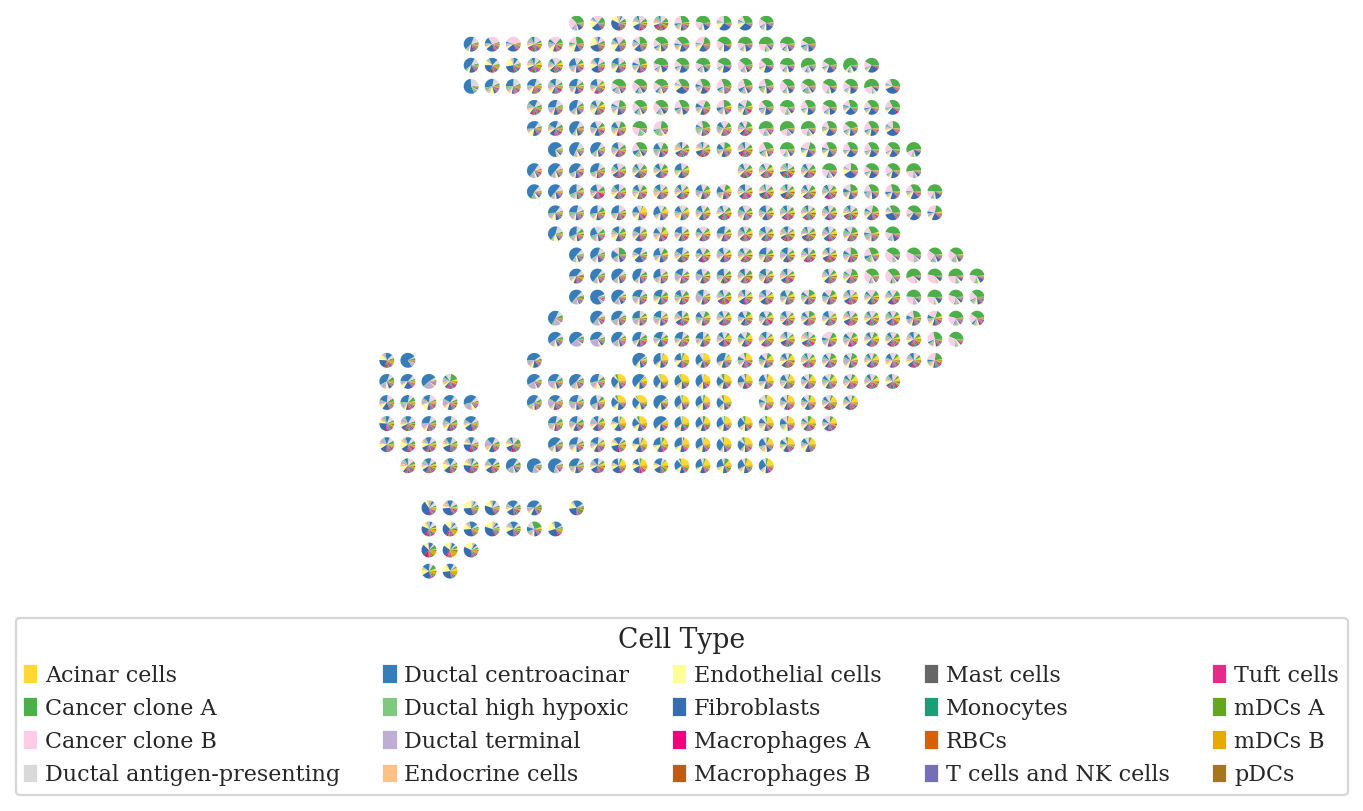

In [ ]:
sigmod_plot.draw_spatial_pie(results["spotiphy"], adata_st.obs, 
                             colors=colors,
                             file_name="5_1_spotiphy_PiePlot.pdf")
# Fig size (7,7)

### Correlation between proportions of scRNA-seq and st-seq

In [9]:
adata_sc = sc.read_h5ad("./Data/sc.h5ad")
adata_sc.var_names = adata_sc.var["features"]

sc.pp.normalize_total(adata_sc, target_sum=1e4)
sc.pp.log1p(adata_sc)

In [18]:
sc_meta = adata_sc.obs
sc_proportions = (sc_meta.groupby('cellType')
                  .size()
                  .reset_index(name='n'))
sc_proportions['freq'] = sc_proportions['n'] / sc_proportions['n'].sum()

reorder = [0, 1, 2, 5, 4, 3] + list(range(6, 13)) + [15] + list(range(17, 20)) + [13, 14, 16]
sc_proportions = sc_proportions.iloc[reorder,]
sc_proportions.index =  results['SIGMOD'].columns

In [16]:
proportions_df = pd.DataFrame({
    'SIGMOD': results['SIGMOD'].apply(lambda x: x.sum()/results['SIGMOD'].sum().sum(), axis=0),
    'tangram': results['tangram'].apply(lambda x: x.sum()/results['tangram'].sum().sum(), axis=0),
    'spotlight': results['spotlight'].apply(lambda x: x.sum()/results['spotlight'].sum().sum(), axis=0),
    'CARD': results['CARD'].apply(lambda x: x.sum()/results['CARD'].sum().sum(), axis=0),
    'RCTD': results['RCTD'].apply(lambda x: x.sum()/results['RCTD'].sum().sum(), axis=0),
    'spotiphy': results['spotiphy'].apply(lambda x: x.sum()/results['spotiphy'].sum().sum(), axis=0),
    'sc': sc_proportions['freq']
})

In [ ]:
prop_cor = proportions_df.corr(method='pearson')
cor_sc = pd.DataFrame({
    'correlation': prop_cor.loc[prop_cor.index != 'sc', 'sc'],
    'methods': prop_cor.index[prop_cor.index != 'sc']
})

### Correlation between markers and proportions

In [14]:
marker_genes = {
    "Acinar cells": [
        "CPA5", "CPA2", "CEL", "SYCN", "CUZD1"
    ],
    "Cancer clone A": [
        "S100P", "COL17A1", "TM4SF1", "PITX1", "CLDN1"
    ],
    "Cancer clone B": [
        "LY6D", "COL6A2", "COL6A1", "CRABP2", "KRT16"
    ],
    "Ductal antigen-presenting": [
        "SPP1", "APCS", "SERPING1", "WFDC2", "AGT"
    ],
    "Ductal centroacinar": [
        "CRISP3", "REG1A", "MMP1", "REG3A", "PIGR"
    ],
    "Ductal high hypoxic": [
        "APOL1", "IGFBP3", "CLDN4", "TACSTD2", "RAP2B"
    ],
    "Ductal terminal": [
        "TFF3", "TFF2", "AGR2", "DPCR1", "KRT8"
    ],
    "Endocrine cells": [
        "SCG3", "NEUROD1", "STMN2", "PCSK1", "SCG5"
    ],
    "Endothelial cells": [
        "ADGRL4", "RAMP2", "VWF", "CLEC14A", "ECSCR"
    ],
    "Fibroblasts": [
        "THBS2", "THY1", "COL3A1", "LUM", "COL1A2"
    ],
    "Macrophages A": [
        "MMP19", "PLA2G7", "FPR3", "SDS", "MS4A4A"
    ],
    "Macrophages B": [
        "FCN1", "MCEMP1", "AQP9", "LILRB1", "SPI1"
    ],
    "Mast cells": [
        "CPA3", "SLC18A2", "MS4A2", "IL1RL1", "HDC"
    ],
    "mDCs A": [
        "CX3CR1", "VSIG4", "CSF1R", "MS4A7", "C1QB"
    ],
    "mDCs B": [
        "C1QC", "C1QB", "C1QA", "CSF1R", "SLCO2B1"
    ],
    "Monocytes": [
        "FCN1", "S100A8", "FPR1", "S1PR4", "SELL"
    ],
    "pDCs": [
        "IRF4", "JCHAIN", "LILRA4", "GZMB", "PLD4"
    ],
    "RBCs": [
        "HBA1", "BRSK1", "FOXJ1", "TBKBP1", "HBA2"
    ],
    "T cells and NK cells": [
        "IL2RB", "CD247", "CD2", "GZMA", "CCL5"
    ],
    "Tuft cells": [
        "SH2D6", "BMX", "TRPM5", "SH2D7", "RGS13"
    ]
}


In [30]:
adata_st[:,'TRPM5'].to_df().iloc[:,0]

10x10    0.0
10x13    0.0
10x14    0.0
10x15    0.0
10x16    0.0
        ... 
9x29     0.0
9x30     0.0
9x31     0.0
9x32     0.0
9x33     0.0
Name: TRPM5, Length: 428, dtype: float64

In [31]:
cor_mat = pd.DataFrame(index=celltypes, columns=results.keys(), dtype=float)
p_mat   = pd.DataFrame(index=celltypes, columns=results.keys(), dtype=float)

for method_name, prop in results.items():
    corrs = []
    ps    = []
    for topic_idx in celltypes:

        genes = marker_genes[topic_idx]
        ests = []
        pvs  = []
        for g in genes:

            r, p = pearsonr(prop.loc[:, topic_idx], adata_st[:,g].to_df().iloc[:,0])
            if not np.isnan(r):
                ests.append(r)
            if not np.isnan(p):
                pvs.append(p)

        mean_r = np.mean(ests) if ests else np.nan

        if pvs:
            chisq_stat = -2 * np.sum(np.log(pvs))
            combined_p = chi2.sf(chisq_stat, df=2*len(pvs))
        else:
            combined_p = np.nan

        corrs.append(mean_r)
        ps.append(combined_p)

    cor_mat[method_name] = corrs
    p_mat[method_name]   = ps

In [34]:
cor_long = (
    cor_mat
    .reset_index()
    .melt(id_vars="index", var_name="methods", value_name="correlation")
    .rename(columns={"index":"celltype"})
)

p_long = (
    p_mat
    .reset_index()
    .melt(id_vars="index", var_name="methods", value_name="pvalue")
    .rename(columns={"index":"celltype"})
)

df = cor_long.merge(p_long, on=["celltype","methods"])

In [53]:
conditions = [
    p_mat < 1e-3,
    p_mat < 1e-2,
    p_mat < 5e-2,
    p_mat < 1e-1,
    p_mat > 1e-1,
]
choices = [3,2, 1.5, 1, 0]

p_mat_dis = pd.DataFrame(
    np.select(conditions, choices, default=np.nan),
    index=p_mat.index,
    columns=p_mat.columns
)

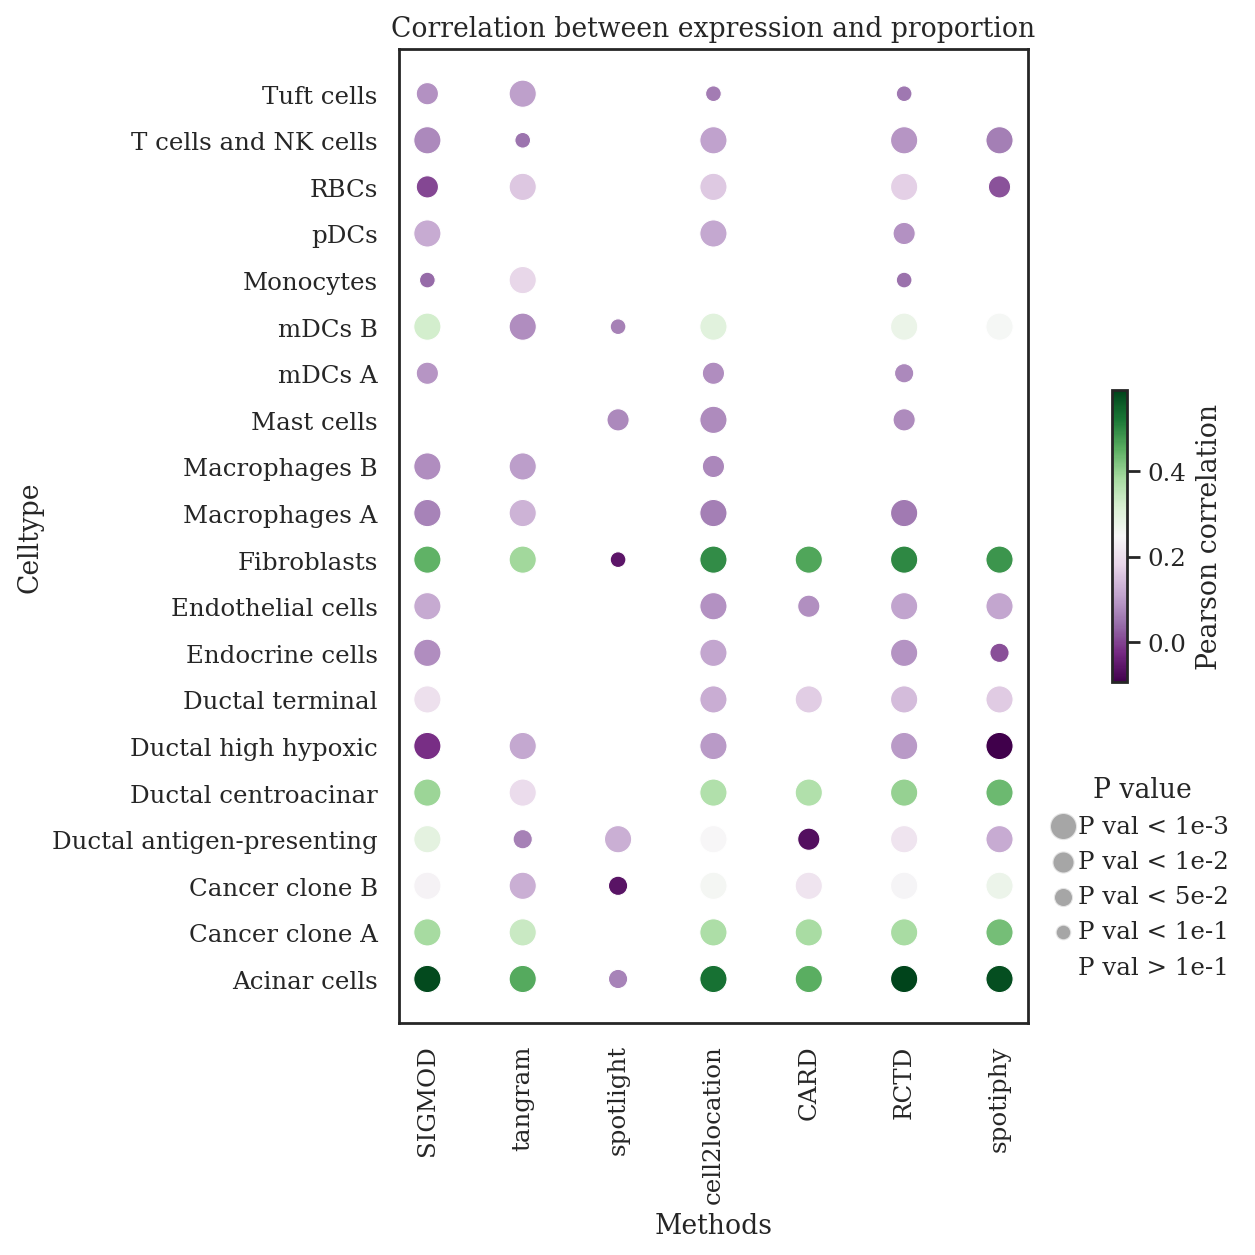

In [80]:
plt.figure(figsize=(8, 8))
group2_names = cor_mat.index
group1_names = cor_mat.columns

x, y = np.meshgrid(group1_names, group2_names)

x = x.flatten()
y = y.flatten()
exp_values = cor_mat.values.flatten()
percent_values = p_mat_dis.values.flatten()

scatter = plt.scatter(x, y, c=exp_values, s=percent_values*50, cmap='PRGn',
                       alpha=1, edgecolors="w", linewidth=0.5)

plt.colorbar(scatter, label='Pearson correlation',pad=0.1,shrink=0.3)

legend_sizes = [3,2,1.5,1,0]
legend_sizes_scaled = [size * 50 for size in legend_sizes]
legend_labels = ["P val < 1e-3",
                 "P val < 1e-2",
                 "P val < 5e-2",
                 "P val < 1e-1",
                 "P val > 1e-1",]

for size, scaled_size, label in zip(legend_sizes, legend_sizes_scaled, legend_labels):
    plt.scatter([], [], s=scaled_size, c='gray', alpha=0.7, edgecolors="w", label=label)

plt.legend(title='P value', loc='center left', bbox_to_anchor=(1.01, 0.15), frameon=False)

plt.xlabel('Methods')
plt.ylabel('Celltype')
plt.title('Correlation between expression and proportion')

plt.xticks(np.arange(len(group1_names)), group1_names, rotation=90)
plt.yticks(np.arange(len(group2_names)), group2_names)

plt.tight_layout()
plt.savefig("Figure/6_Marker_Cor.pdf",dpi=300)
plt.show()

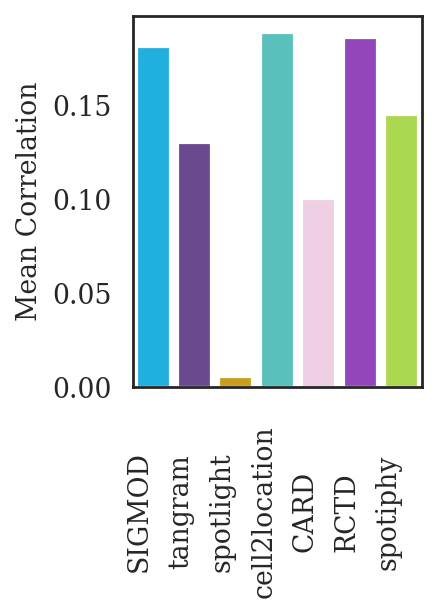

In [ ]:
cor_mean = pd.DataFrame({
    "methods":   cor_mat.columns,
    "mean_cor":  cor_mat.mean(axis=0, skipna=True).values
})

cor_mean["methods"] = pd.Categorical(
    cor_mean["methods"],
    categories=cor_mean["methods"],
    ordered=True
)

plt.figure(figsize=(3, 4))

colors = ["#00BFFF","#6A3D9A","#E6AB02","#48D1CC",
          "#F4CAE4","#9933CC","#B3EE3A"]

ax = sns.barplot(
    data=cor_mean,
    x="methods", y="mean_cor",
    palette=colors
)

ax.set_xlabel("")
ax.set_ylabel("Mean Correlation")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    ha="right", va="center",
    fontsize=12
)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="x", pad=50)
# sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.savefig("Figure/6_1_Marker_Cor_mean.pdf",dpi=300)
plt.show()

Region Difference analysis

In [16]:
layer_manual_PDAC = adata_st.obs
layer_manual_PDAC = layer_manual_PDAC[layer_manual_PDAC.Region != "NotAnno"]

In [108]:
results_anno = {}
for name, prop in results.items():

    df = prop.loc[layer_manual_PDAC.index].copy()
    
    reg = layer_manual_PDAC['Region']
    df['CancerRegion']     = np.where(reg == 'Cancer', 'Cancer', 'Non-Cancer')
    df['PancreaticRegion'] = np.where(reg == 'Pancreatic', 'Pancreatic', 'Non-Pancreatic')
    df['DuctEpithelium']   = np.where(reg == 'Duct Epithelium',
                                       'Duct Epithelium',
                                       'Non-Duct Epithelium')
    
    results_anno[name] = df

fold_change_list = []
for name, df in results_anno.items():
    cols = df.columns[:20]

    gm_cancer = df.groupby('CancerRegion')[cols].mean()
    gm_duct   = df.groupby('DuctEpithelium')[cols].mean()
    gm_panc   = df.groupby('PancreaticRegion')[cols].mean()
    
    fc_cancer = gm_cancer.loc['Cancer'] / gm_cancer.loc['Non-Cancer']
    fc_duct   = gm_duct.loc['Duct Epithelium'] / gm_duct.loc['Non-Duct Epithelium']
    fc_panc   = gm_panc.loc['Pancreatic'] / gm_panc.loc['Non-Pancreatic']
    
    fc_df = pd.DataFrame({
        'cancer': fc_cancer,
        'duct':   fc_duct,
        'panc':   fc_panc
    })
    fc_df.index.name = 'topic'

    fc_df['method'] = name
    fold_change_list.append(fc_df.reset_index().set_index(['method','topic']))

fold_change_matrix = pd.concat(fold_change_list)


p_value_list = []
for name, df in results_anno.items():

    def test(col, grp, cat1, cat2):
        x = df.loc[grp == cat1, col]
        y = df.loc[grp == cat2, col]
        return mannwhitneyu(x, y, alternative='two-sided').pvalue
    
    p_cancer = {col: test(col, df['CancerRegion'], 'Non-Cancer', 'Cancer')
                for col in df.columns[:20]}
    p_duct   = {col: test(col, df['DuctEpithelium'], 'Non-Duct Epithelium', 'Duct Epithelium')
                for col in df.columns[:20]}
    p_panc   = {col: test(col, df['PancreaticRegion'], 'Non-Pancreatic', 'Pancreatic')
                for col in df.columns[:20]}
    
    pv_df = pd.DataFrame({
        'cancer': pd.Series(p_cancer),
        'duct':   pd.Series(p_duct),
        'panc':   pd.Series(p_panc)
    })
    pv_df.index.name = 'topic'
    pv_df['method'] = name
    p_value_list.append(pv_df.reset_index().set_index(['method','topic']))

p_value_matrix = pd.concat(p_value_list)

In [118]:
fc_long = (
    fold_change_matrix
    .rename_axis(index=['method','topic'], columns='region')
    .stack()
    .reset_index(name='foldchange')
)

In [120]:
pva_long = (
    p_value_matrix
    .rename_axis(index=['method','topic'], columns='region')
    .stack()
    .reset_index(name='pval')
)

In [124]:
df = fc_long.merge(pva_long,on = ["method","topic","region"])

In [137]:
df.loc[:,"log2FC"] = np.log2(df.foldchange)

In [143]:
df

,method,topic,region,foldchange,pval,Celltype,Significance,log2FC,Pvalue
0,SIGMOD,Acinar cells,cancer,0.325622,9.554425e-13,Acinar cells (cancer),p<0.001,-1.618731,3.0
1,SIGMOD,Acinar cells,duct,0.192207,4.850580e-15,Acinar cells (duct),p<0.001,-2.379264,3.0
2,SIGMOD,Acinar cells,panc,3.419067,8.907521e-22,Acinar cells (panc),p<0.001,1.773603,3.0
3,SIGMOD,Cancer clone A,cancer,6.899309,1.656728e-57,Cancer clone A (cancer),p<0.001,2.786452,3.0
4,SIGMOD,Cancer clone A,duct,0.107231,1.558657e-17,Cancer clone A (duct),p<0.001,-3.221200,3.0
...,...,...,...,...,...,...,...,...,...
415,spotiphy,T cells and NK cells,duct,0.904659,3.025222e-02,T cells and NK cells (duct),p<0.05,-0.144554,1.5
416,spotiphy,T cells and NK cells,panc,1.037985,3.022215e-01,T cells and NK cells (panc),p>0.05,0.053785,0.0
417,spotiphy,Tuft cells,cancer,0.699626,4.643317e-13,Tuft cells (cancer),p<0.001,-0.515345,3.0
418,spotiphy,Tuft cells,duct,0.791611,1.412918e-04,Tuft cells (duct),p<0.001,-0.337137,3.0


In [142]:
conditions = [
    df['pval'] < 1e-3,
    df['pval']  < 1e-2,
    df['pval']  < 5e-2,
    df['pval']  < 1e-1,
    df['pval']  > 1e-1,
]
choices = [3,2, 1.5, 1, 0]
df["Pvalue"] = np.select(conditions, choices, default=np.nan)

In [ ]:
df['celltype'] = df['topic'] + '_' + df['region']

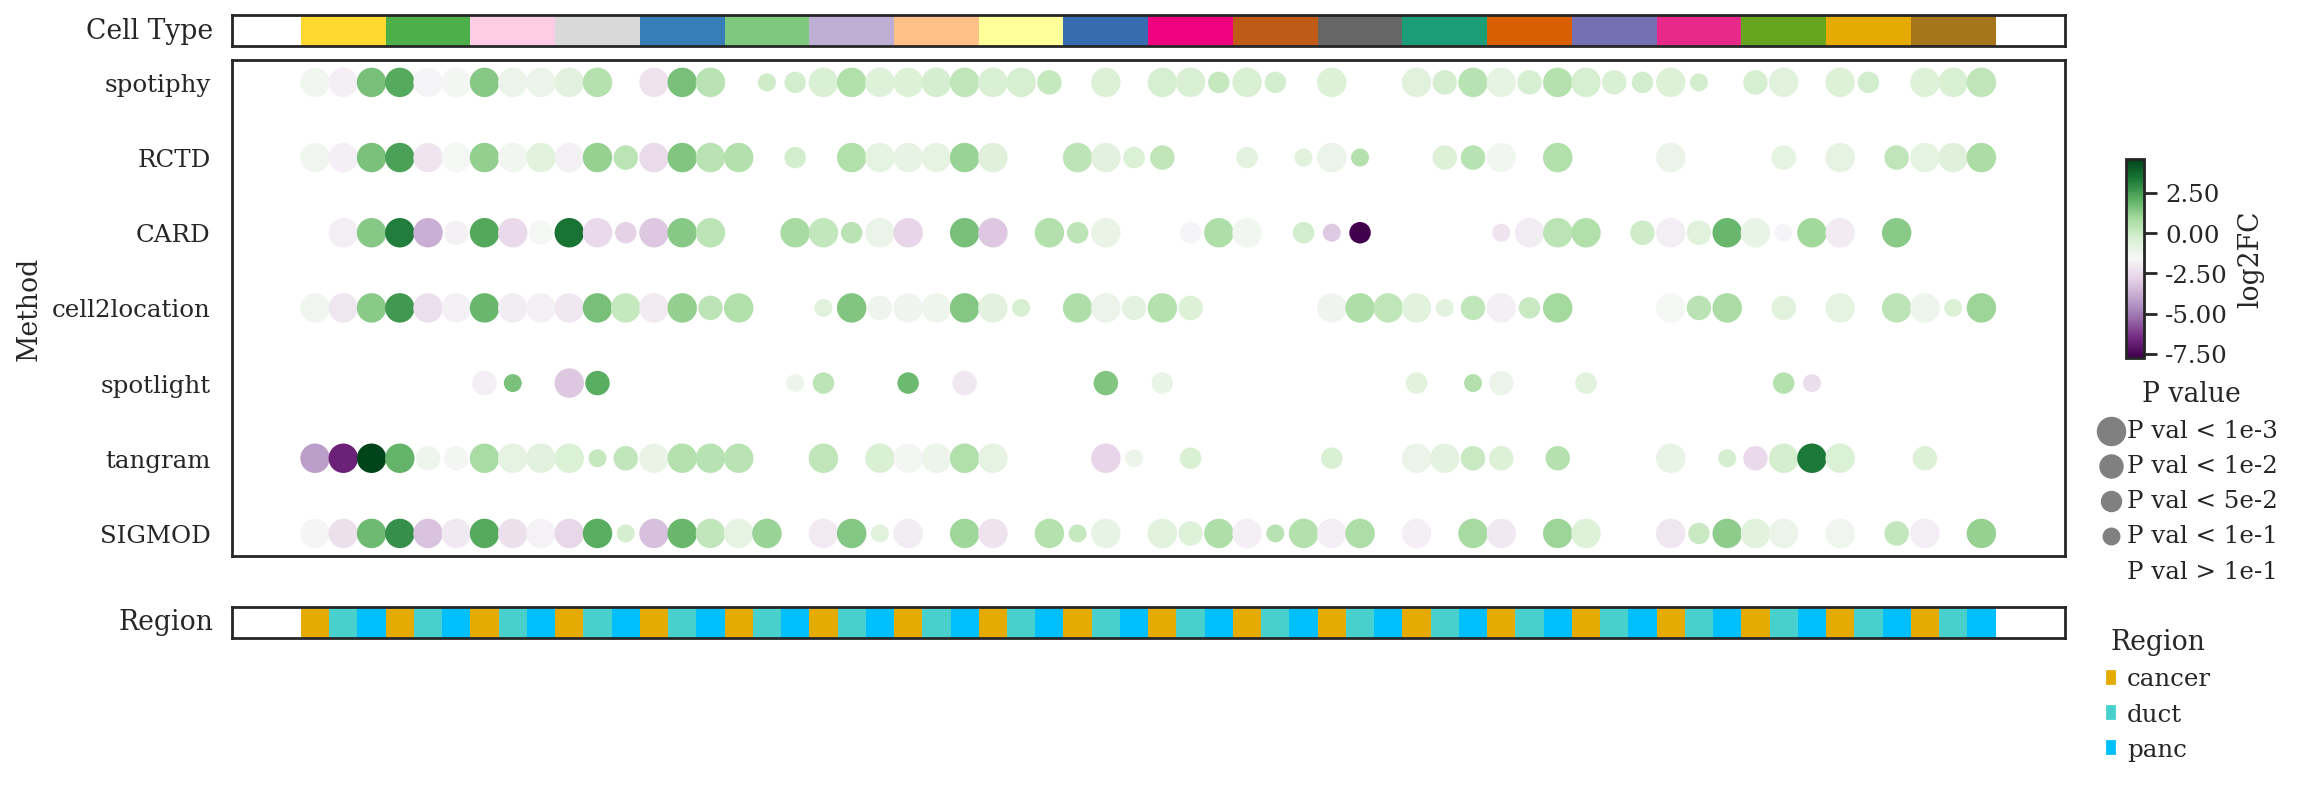

In [210]:
# Set up figure with gridspec for main plot and annotation bars
fig = plt.figure(figsize=(15, 5), constrained_layout=True)
gs = fig.add_gridspec(4, 2, height_ratios=[0.5, 8, 0.5, 0.5], width_ratios=[1, 0.05], wspace=0.05, hspace=0.05)
ax_main = fig.add_subplot(gs[1, 0])
ax_top = fig.add_subplot(gs[0, 0], sharex=ax_main)
ax_region = fig.add_subplot(gs[2, 0], sharex=ax_main)
# ax_bottom = fig.add_subplot(gs[3, 0], sharex=ax_main)
# Create a shorter colorbar axis using inset_axes
ax_cbar = inset_axes(
    ax_main,
    width="1%",  # Width of colorbar (relative to main plot)
    height="40%",  # Height of colorbar (30% of main plot, similar to shrink=0.3)
    loc='center right',  # Position at right center
    bbox_to_anchor=(0.05, 0.1, 1, 1), 
    bbox_transform=ax_main.transAxes
)

# Prepare data for scatter plot
unique_celltypes = df['celltype'].unique()
unique_methods = df['method'].unique()
x_map = {celltype: i for i, celltype in enumerate(unique_celltypes)}
y_map = {method: i for i, method in enumerate(unique_methods)}

df['dot_size'] = df['Pvalue']*50

# Create scatter plot
scatter = ax_main.scatter(
    [x_map[ct] for ct in df['celltype']],
    [y_map[m] for m in df['method']],
    s=df['dot_size'],
    c=df['log2FC'],
    cmap='PRGn',
    norm=Normalize(df['log2FC'].min(), df['log2FC'].max())
)

# Customize main plot
# ax_main.set_xticks(range(len(unique_celltypes)))
# ax_main.set_xticklabels(unique_celltypes, rotation=45, ha='right') 取消xticklabel
ax_main.set_yticks(range(len(unique_methods)))
ax_main.set_yticklabels(unique_methods)
ax_main.set_ylabel('Method')
ax_main.set_xlabel('')

# Add colorbar for log2FC in separate axis
cbar = fig.colorbar(scatter, cax=ax_cbar, label='log2FC', orientation='vertical',pad=0.1,shrink=0.3)
cbar.locator = plt.MaxNLocator(nbins=5)  # Limit to ~5 ticks
cbar.formatter = plt.FormatStrFormatter('%.2f')  # Format ticks to 2 decimal places
cbar.update_ticks()

# Add legend for significance with original values
legend_sizes = [3,2,1.5,1,0]
legend_sizes_scaled = [size * 50 for size in legend_sizes]
legend_labels = ["P val < 1e-3",
                 "P val < 1e-2",
                 "P val < 5e-2",
                 "P val < 1e-1",
                 "P val > 1e-1",]

legend_elements = [
    plt.scatter([], [], s=size, color='gray', label=label)
    for size, label in zip(legend_sizes_scaled, legend_labels)
]


ax_main.legend(title='P value', handles=legend_elements,loc='center left', bbox_to_anchor=(1.01, 0.15), frameon=False)

# Top annotation bar for topics
unique_topics = df['topic'].unique()
topic_colors = ["#FFD92F","#4DAF4A","#FCCDE5","#D9D9D9","#377EB8","#7FC97F","#BEAED4",
           "#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02",
           "#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D"]
topic_color_dict = dict(zip(unique_topics, topic_colors))

for i, celltype in enumerate(unique_celltypes):
    topic = df[df['celltype'] == celltype]['topic'].iloc[0]
    rect = Rectangle((i - 0.5, 0), 1, 1, facecolor=topic_color_dict[topic], edgecolor='none')
    ax_top.add_patch(rect)

ax_top.set_ylim(0, 1)
ax_top.set_yticks([])
ax_top.set_xticks([])
ax_top.text(
    -0.01, 0.5,
    'Cell Type',
    rotation=0,
    verticalalignment='center',
    horizontalalignment='right',
    transform=ax_top.transAxes,
    fontsize=12
)
# # Create legend for topics
# topic_patches = [Rectangle((0, 0), 1, 1, facecolor=topic_color_dict[topic]) for topic in unique_topics]
# ax_top.legend(
#     topic_patches,
#     unique_topics,
#     title='Topic',
#     bbox_to_anchor=(1.05, 1),
#     loc='upper left'
# )

# Region annotation bar
unique_regions = df['region'].unique()
region_colors = ["#E6AB02", "#48D1CC","#00BFFF"]
region_color_dict = dict(zip(unique_regions, region_colors))

for i, celltype in enumerate(unique_celltypes):
    region = df[df['celltype'] == celltype]['region'].iloc[0]
    rect = Rectangle((i - 0.5, 0), 1, 1, facecolor=region_color_dict[region], edgecolor='none')
    ax_region.add_patch(rect)

ax_region.set_ylim(0, 1)
ax_region.set_yticks([])
ax_region.set_xticks([])

# Create legend for regions
region_patches = [Rectangle((0, 0), 1, 1, facecolor=region_color_dict[region]) for region in unique_regions]
region_legend = ax_region.legend(
    region_patches,
    unique_regions,
    title='Region',
    bbox_to_anchor=(1.01, 1),
    loc='upper left'
)
region_legend.set_frame_on(False)

ax_region.text(
    -0.01, 0.5,
    'Region',
    rotation=0,
    verticalalignment='center',
    horizontalalignment='right',
    transform=ax_region.transAxes,
    fontsize=12
)
# Bottom axis for celltype labels
# ax_bottom.set_ylim(0, 1)
# ax_bottom.set_yticks([])
# ax_bottom.set_xticks([])
# ax_bottom.set_xticklabels(unique_celltypes, rotation=45, ha='right')
# ax_bottom.set_xlabel('Celltype')

# Save the plot
plt.savefig('Figure/7_marker_distribution_dotplot.pdf',dpi = 300)
plt.show()

In [55]:
hypo = ["APOL1","IGFBP3","CLDN4","TACSTD2","RAP2B","SAT1","DUOX2","C15orf48","SOX4","CA9","SRD5A3","TPM1",
        "BNIP3","CLDN3","MUC20","DUSP5","RAB11FIP1","PGK1","PDZK1IP1","DUOXA2","EGLN3","ERO1A","SERPING1",
        "ADM","EDN1","CDKN1C","IL32","APOL2","CREB5","MDK","TSHZ2","VNN1","PDLIM1","PFKP","MYADM","SLC2A1",
        "CA12","NDRG1","PRSS8","ATF3","PIM1","GADD45A","BMP2","VEGFA","RNASET2","SLC6A8","CXCL8" ]
duct_hypo = adata_st[:,hypo].to_df()
duct_hypo['HypoSum'] = duct_hypo.sum(axis=1)

duct_hypo = duct_hypo.loc[layer_manual_PDAC.index].copy()
duct_hypo = duct_hypo.join(layer_manual_PDAC[['Region']])

duct_hypo['CancerRegion'] = pd.Categorical(
    np.where(duct_hypo['Region']=='Cancer','Cancer','Non-Cancer'),
    categories=['Cancer','Non-Cancer'],
    ordered=True
)
duct_hypo['PancreaticRegion'] = pd.Categorical(
    np.where(duct_hypo['Region']=='Pancreatic','Pancreatic','Non-Pancreatic'),
    categories=['Pancreatic','Non-Pancreatic'],
    ordered=True
)
duct_hypo['DuctEpithelium'] = pd.Categorical(
    np.where(duct_hypo['Region']=='Duct Epithelium','Duct Epithelium','Non-Duct Epithelium'),
    categories=['Duct Epithelium','Non-Duct Epithelium'],
    ordered=True
)

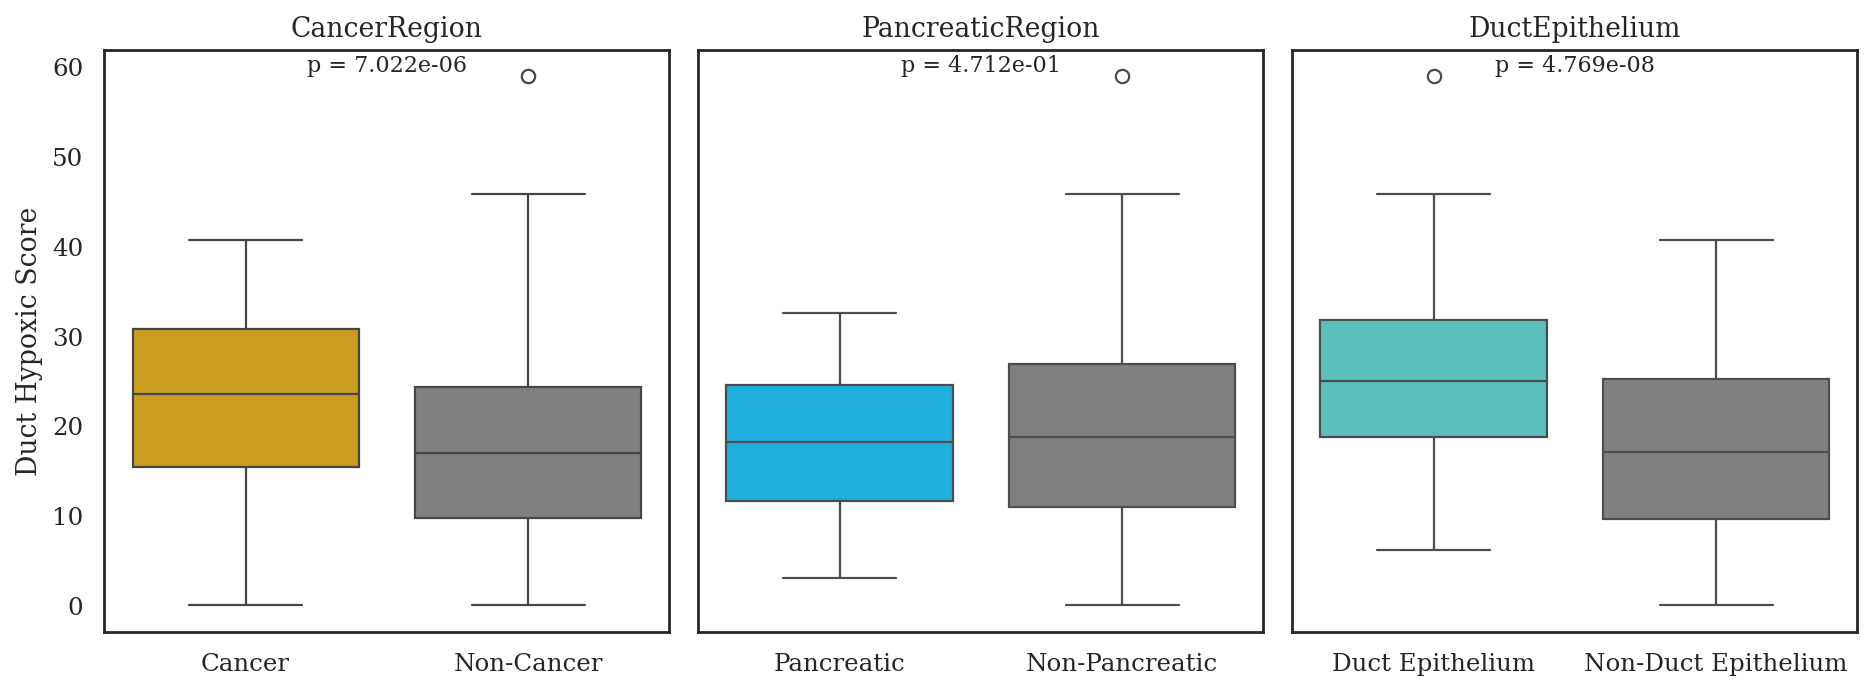

In [56]:
group_cols = ['CancerRegion','PancreaticRegion','DuctEpithelium']
colorlist = {
    'CancerRegion':   "#E6AB02",
    'PancreaticRegion': "#00BFFF",
    'DuctEpithelium': "#48D1CC"
}

fig, axes = plt.subplots(1, len(group_cols), figsize=(12, 4.5), sharey=True)

for ax, col in zip(axes, group_cols):

    sns.boxplot(
        data=duct_hypo,
        x=col,
        y="HypoSum",
        palette=[colorlist[col], "grey"],
        ax=ax
    )

    levels = duct_hypo[col].cat.categories
    g1 = duct_hypo.loc[duct_hypo[col]==levels[0], 'HypoSum']
    g2 = duct_hypo.loc[duct_hypo[col]==levels[1], 'HypoSum']
    stat, p = mannwhitneyu(g1, g2, alternative='two-sided')

    y_max = duct_hypo['HypoSum'].max()
    ax.text(
        0.5, y_max, f"p = {p:.3e}",
        ha='center', va='bottom',
        fontsize=10
    )

    ax.set_xlabel('')
    if col == 'CancerRegion':
        ax.set_ylabel("Duct Hypoxic Score")
    else:
        ax.set_ylabel('')
    ax.set_title(col)

    if ax.get_legend():
        ax.get_legend().remove()

plt.tight_layout()
plt.savefig("Figure/7_1_HypoxicScore.pdf", dpi=300)
plt.show()

Odds Ratio across Regions

In [15]:
results_dominant = {}

for method, prop in results.items():

    prop_only = prop.eq(prop.max(axis=1), axis=0).astype(int)
    
    prop_only = prop_only.loc[layer_manual_PDAC.index].copy()
    
    region = layer_manual_PDAC['Region']
    prop_only['Region'] = region
    
    prop_only['CancerRegion'] = pd.Categorical(
        np.where(region == 'Cancer', 'Cancer', 'Non-Cancer'),
        categories=['Non-Cancer','Cancer'],
        ordered=True
    )
    prop_only['PancreaticRegion'] = pd.Categorical(
        np.where(region == 'Pancreatic', 'Pancreatic', 'Non-Pancreatic'),
        categories=['Non-Pancreatic','Pancreatic'],
        ordered=True
    )
    prop_only['DuctEpithelium'] = pd.Categorical(
        np.where(region == 'Duct Epithelium', 'Duct Epithelium', 'Non-Duct Epithelium'),
        categories=['Non-Duct Epithelium','Duct Epithelium'],
        ordered=True
    )
    
    results_dominant[method] = prop_only


In [23]:
rows = []
for method, prop in results_dominant.items():
    
    print(method)
    table_a = pd.crosstab(prop['PancreaticRegion'], prop['Acinar cells'])
    if table_a.shape[1] == 2:
        or_a, p_a = fisher_exact(table_a.values)
    else:
        or_a, p_a = 1,1
    
    table_d = pd.crosstab(prop['DuctEpithelium'], prop['Ductal centroacinar'])
    if table_d.shape[1] == 2:
        or_d, p_d = fisher_exact(table_d.values)
    else:
        or_d, p_d = 1,1
    
    sum_clone = prop['Cancer clone A'] + prop['Cancer clone B']
    table_c = pd.crosstab(sum_clone, prop['CancerRegion'])
    # ensure it's a 2×2 in the order [0,1] × ['Non-Cancer','Cancer']
    table_c = table_c.reindex(index=[0,1], columns=['Non-Cancer','Cancer'], fill_value=0)
    if table_c.shape[1] == 2:
        or_c, p_c = fisher_exact(table_c.values)
    else:
        or_c, p_c = 1,1
    
    df = pd.DataFrame({
        'pvalue':   [p_a, p_d, p_c],
        'odds':     [or_a, or_d, or_c],
        'celltype': [
            'Acinar cells in Pancreatic',
            'Ductal centroacinar in Duct Epithelium',
            'Cancer clones in Cancer'
        ],
        'method': method
    })
    rows.append(df)

odds_ratio = pd.concat(rows, ignore_index=True)

SIGMOD
tangram
spotlight
cell2location
CARD
RCTD
spotiphy


In [24]:
odds_ratio

,pvalue,odds,celltype,method
0,6.844793e-14,11.964286,Acinar cells in Pancreatic,SIGMOD
1,6.322819e-33,76.292683,Ductal centroacinar in Duct Epithelium,SIGMOD
2,6.880086e-62,100.378125,Cancer clones in Cancer,SIGMOD
3,1.000000e+00,1.000000,Acinar cells in Pancreatic,tangram
4,1.487893e-05,3.382237,Ductal centroacinar in Duct Epithelium,tangram
5,3.149787e-08,5.162626,Cancer clones in Cancer,tangram
6,1.000000e+00,0.845411,Acinar cells in Pancreatic,spotlight
7,3.676378e-01,0.000000,Ductal centroacinar in Duct Epithelium,spotlight
8,1.000000e+00,0.000000,Cancer clones in Cancer,spotlight
9,6.989555e-01,1.133987,Acinar cells in Pancreatic,cell2location


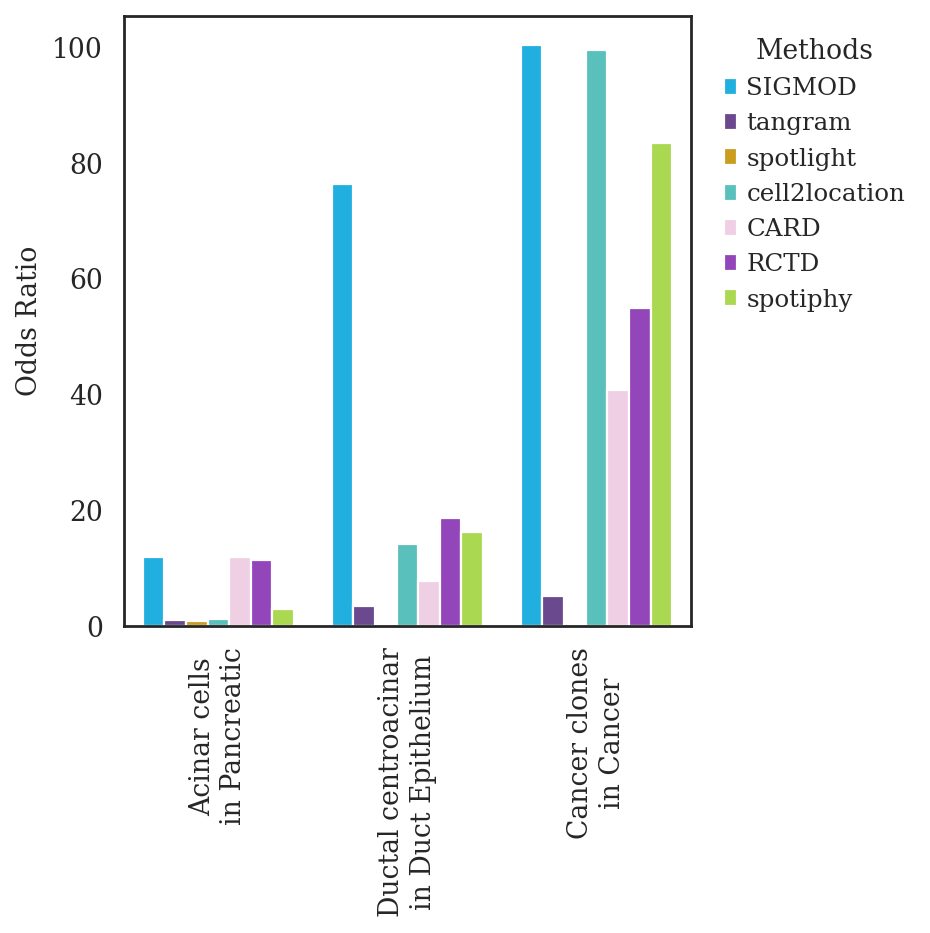

In [36]:
palette_methods = ["#00BFFF","#6A3D9A","#E6AB02","#48D1CC",
          "#F4CAE4","#9933CC","#B3EE3A"]

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(
    data=odds_ratio,
    x="celltype",
    y="odds",
    hue="method",
    palette=palette_methods,
    dodge=True,
    ax=ax
)

ax.set_xlabel("")
ax.set_ylabel("Odds Ratio") 

ax.set_xticklabels(
    ['Acinar cells\nin Pancreatic',
     'Ductal centroacinar\nin Duct Epithelium',
     'Cancer clones\nin Cancer'], 
    rotation=90,
    ha='center',
    fontsize=12,
)
ax.tick_params(axis="y", labelsize=12)

ax.legend(
    title="Methods",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

plt.tight_layout()
plt.savefig('Figure/8_odds_ratio_barplot.pdf',dpi = 300)
plt.show()

Cell Cell Interaction

In [10]:
import sys
sys.path.append("..")

from SIGMOD import SIGMOD_CCI as cci

In [53]:
import importlib
importlib.reload(cci)

<module 'SIGMOD.SIGMOD_CCI' from '/home/liuchang/3.0_Result/4.0_NGDeonv/0315/PDAC/../SIGMOD/SIGMOD_CCI.py'>

In [11]:
eta = pd.read_csv("./Results/SIGMOD/eta_scaled.csv",index_col=0)
eta.index = ["Niche"+str(i+1) for i in range(12)]

In [15]:
niche_construct = pd.read_csv('./Results/SVLR/3_lr_niche12.csv',index_col=0)

In [16]:
lr_celltype = niche_construct.values @ eta
lr_celltype.index = niche_construct.index

In [17]:
ligands = [i[0] for i in lr_celltype.index.str.split("_")]
receptors = [i[1] for i in lr_celltype.index.str.split("_")]
ligands = list(set(ligands))
receptors = list(set(receptors))
lr = ligands.copy()
lr.extend(receptors)
lr = list(set(lr) & set(adata_sc.var_names))

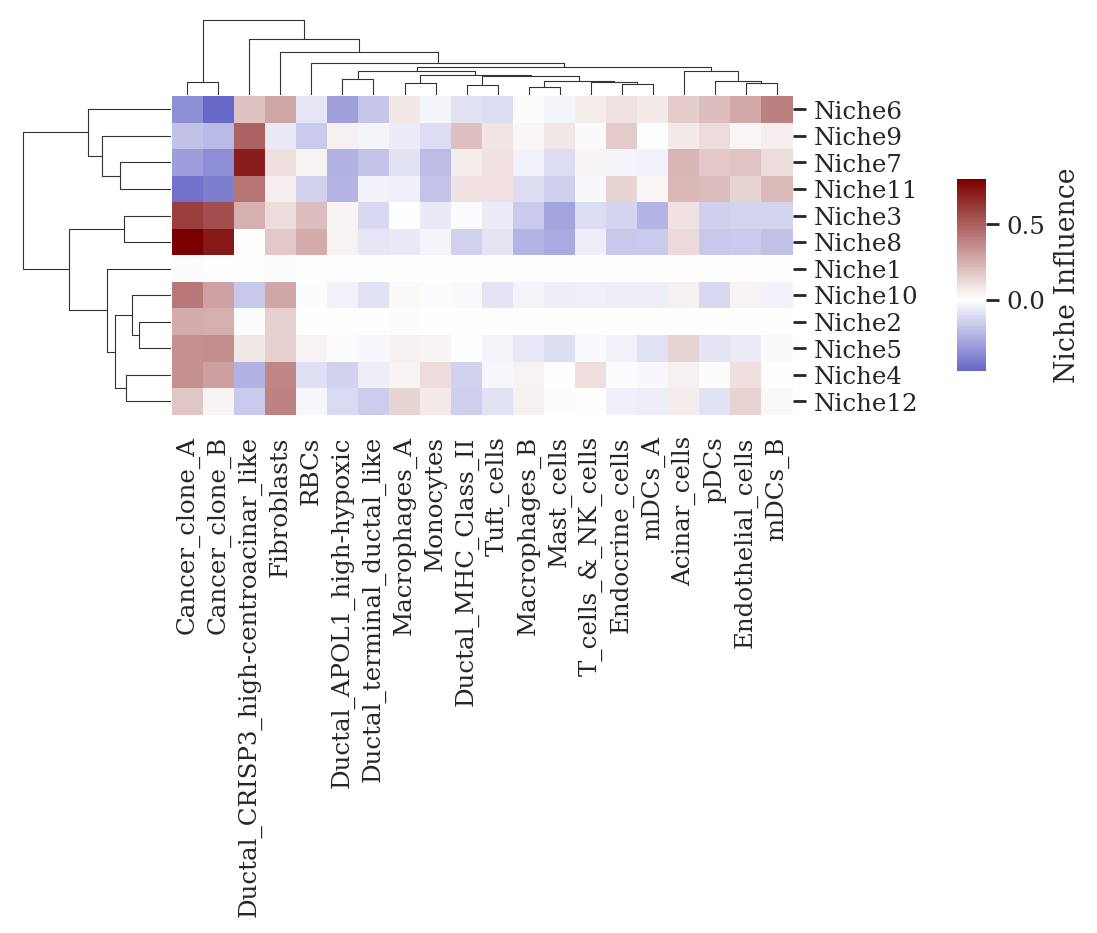

In [25]:
high_color = "#7A0000"
low_color = "#0000A3"
cmap = LinearSegmentedColormap.from_list(
    'niche_influence_cmap',
    [low_color, 'white', high_color]
)

# draw a clustered heatmap (rows & columns clustered)
cg = sns.clustermap(
    eta,
    cmap=cmap,
    center=0,
    # vmin=-4, vmax=4,
    row_cluster=True,
    col_cluster=True,
    figsize=(6, 6),
    cbar_kws={'label': 'Niche Influence'}
)

cg.cax.set_position([1.01, 0.60, 0.03, 0.20])

plt.show()

# save as PDF
cg.fig.savefig(
    "./Figure/9_scaled_eta.pdf",
    format='pdf',
    bbox_inches='tight'
)

In [26]:
pos = adata_st.obs
pos = pos[["x","y"]]
theta = results["SIGMOD"].loc[pos.index]

tau = cci.SE_kernel(X=pos.iloc[:, [0, 1]], length_scale=6/2)

spatial_corr = cci.compute_spatial_corr_matrix(theta,tau)

Computing spatial correlations:   0%|          | 0/20 [00:00<?, ?it/s]

In [27]:
lr_effect = cci.get_lr_effect(niche_construct, eta)
diff_lr = cci.get_diff_lr(adata_sc,"cellType",lr)
select_lr,l_exp,r_exp = cci.generate_matched_lr(lr_effect.T, diff_lr.T)
masked_r_exp = cci.mask_lr_effect(lr_effect.T,r_exp)

In [28]:
l_exp = l_exp.iloc[[0,1,2,5,4,3,6,7,8,9,10,11,12,17,18,13,19,14,15,16],:]
l_exp.index = spatial_corr.columns

In [29]:
masked_r_exp = masked_r_exp.iloc[[0,1,2,5,4,3,6,7,8,9,10,11,12,17,18,13,19,14,15,16],:]
masked_r_exp.index = spatial_corr.columns

In [30]:
interaction_dict = cci.compute_interaction_dict(spatial_corr,l_exp,masked_r_exp)

In [31]:
mats = list(interaction_dict.values())

total_interaction = sum(mats[1:], mats[0])

In [32]:
colors = ["#FFD92F","#4DAF4A","#FCCDE5","#D9D9D9","#377EB8","#7FC97F","#BEAED4",
           "#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02",
           "#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D"]
celltypes = ["Acinar cells","Cancer clone A","Cancer clone B","Ductal antigen-presenting","Ductal centroacinar",
              "Ductal high hypoxic","Ductal terminal","Endocrine cells","Endothelial cells","Fibroblasts",
              "Macrophages A","Macrophages B","Mast cells","mDCs A","mDCs B",
              "Monocytes","pDCs","RBCs","T cells and NK cells","Tuft cells"]

In [33]:
total_interaction

,Acinar cells,Cancer clone A,Cancer clone B,Ductal antigen-presenting,Ductal centroacinar,Ductal high hypoxic,Ductal terminal,Endocrine cells,Endothelial cells,Fibroblasts,Macrophages A,Macrophages B,Mast cells,mDCs A,mDCs B,Monocytes,pDCs,RBCs,T cells and NK cells,Tuft cells
Acinar cells,0.0,0.000000,0.001654,0.000000,0.000000,0.000000,0.000000,0.0,0.000376,0.000000,0.004171,0.000057,-0.000005,0.006729,0.035516,0.000369,0.030118,0.0,0.000842,0.000000
Cancer clone A,0.0,7.596718,6.667669,0.297105,-0.249978,-0.068917,0.237280,0.0,0.158334,0.069825,0.056704,0.038465,0.000000,0.028803,-0.072974,0.000000,0.000000,0.0,0.000000,0.103223
Cancer clone B,0.0,7.340542,6.687257,0.278306,-0.200083,-0.055465,0.238369,0.0,0.135764,0.045961,0.042774,0.026815,0.000812,0.021992,-0.082766,-0.002558,0.000000,0.0,0.000000,0.098380
Ductal antigen-presenting,0.0,-1.321978,-1.075816,0.400208,1.253229,0.090905,-0.090606,0.0,-0.006549,-0.103753,0.000527,-0.020180,-0.000270,-0.011611,0.014656,-0.000318,0.000000,0.0,0.000000,-0.013947
Ductal centroacinar,0.0,0.000000,0.000000,0.462250,1.285677,0.070610,-0.072330,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Ductal high hypoxic,0.0,-2.076567,-1.457435,-0.203593,0.222556,0.022398,-0.073208,0.0,0.009510,-0.186814,0.020203,-0.023411,-0.000228,-0.010454,-0.019026,-0.000429,0.000000,0.0,0.000000,-0.019942
Ductal terminal,0.0,-1.684763,-1.465412,-0.068347,0.188407,0.004677,-0.099568,0.0,-0.019588,-0.059466,-0.006115,-0.015369,0.000000,-0.011694,0.021607,0.000000,0.000000,0.0,0.000000,-0.018756
Endocrine cells,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Endothelial cells,0.0,-0.169322,0.051622,0.005397,0.217120,0.013434,-0.008469,0.0,0.122181,0.615409,-0.163028,-0.087467,0.000215,-0.035660,0.358451,0.007166,0.000000,0.0,0.000000,0.000003
Fibroblasts,0.0,0.243153,0.074320,0.004808,-0.146029,0.113353,0.045210,0.0,0.258040,4.554093,-0.028274,-0.018143,-0.016282,0.004955,0.304711,0.013182,-0.027587,0.0,0.007388,-0.000022


In [33]:
node_color_map = {}
for celltype, color in zip(celltypes,colors):
    node_color_map[celltype] = color

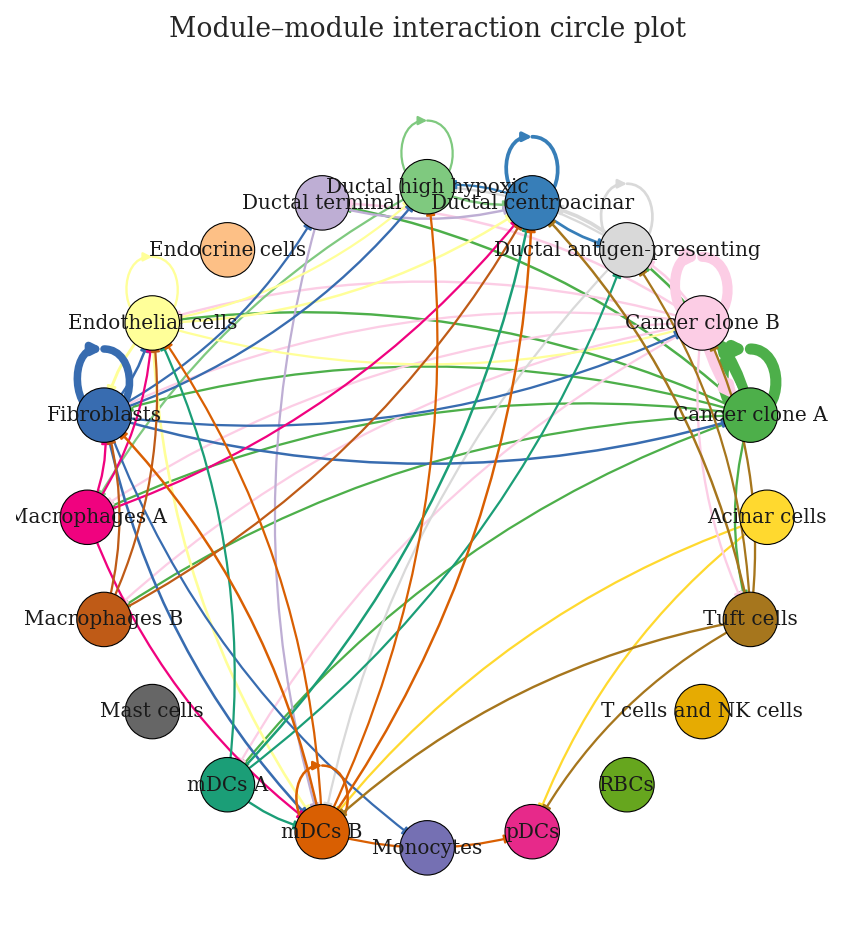

In [49]:
sigmod_plot.plot_circle_interactions(total_interaction,node_color_map,threshold=0.01,
                                     edge_cmap="Reds",max_width=5,min_width=1,
                                     figsize=(5.5,6),
                                     file_name="Figure/10_1_TotalInteraction.pdf")

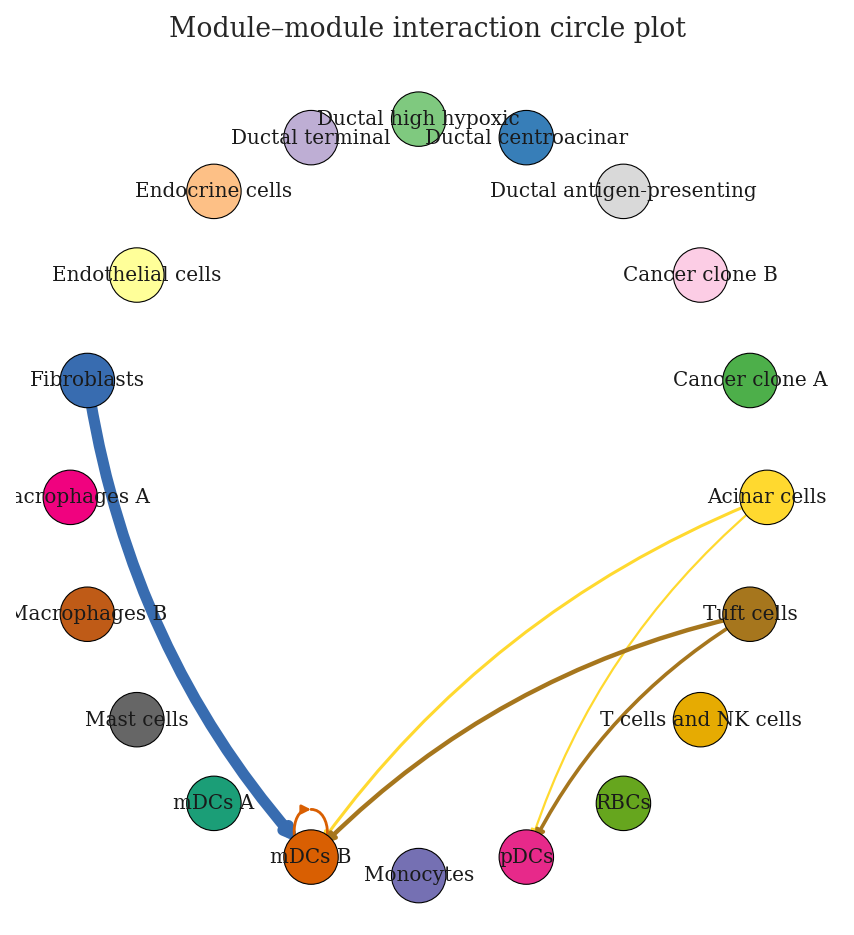

In [50]:
sigmod_plot.plot_circle_interactions(interaction_dict["CXCL12_CD4"],node_color_map,threshold=0.01,
                                     edge_cmap="Reds",max_width=5,min_width=1,figsize=(5.5,6),
                                     file_name="Figure/10_2_CXCL12_CD4.pdf")

In [35]:
result = (
    pd.concat(interaction_dict)
      .stack()
      .reset_index(name='value')
      .rename(columns={
          'level_0': 'LR',
          'level_1': 'source',
          'level_2': 'target'
      })
      )

In [47]:
filtered = result[result.source.isin(['Cancer clone A','Cancer clone B','Fibroblasts'])]
filtered = filtered[result.target.isin(['Cancer clone A','Cancer clone B','Fibroblasts'])]
filtered = filtered[filtered.value >1]
filtered["cellpair"] = filtered["source"] + "-" + filtered["target"]

In [49]:
filtered_wide = pd.pivot(filtered,index="cellpair",columns="LR",values="value",)
filtered_wide = filtered_wide.fillna(0)

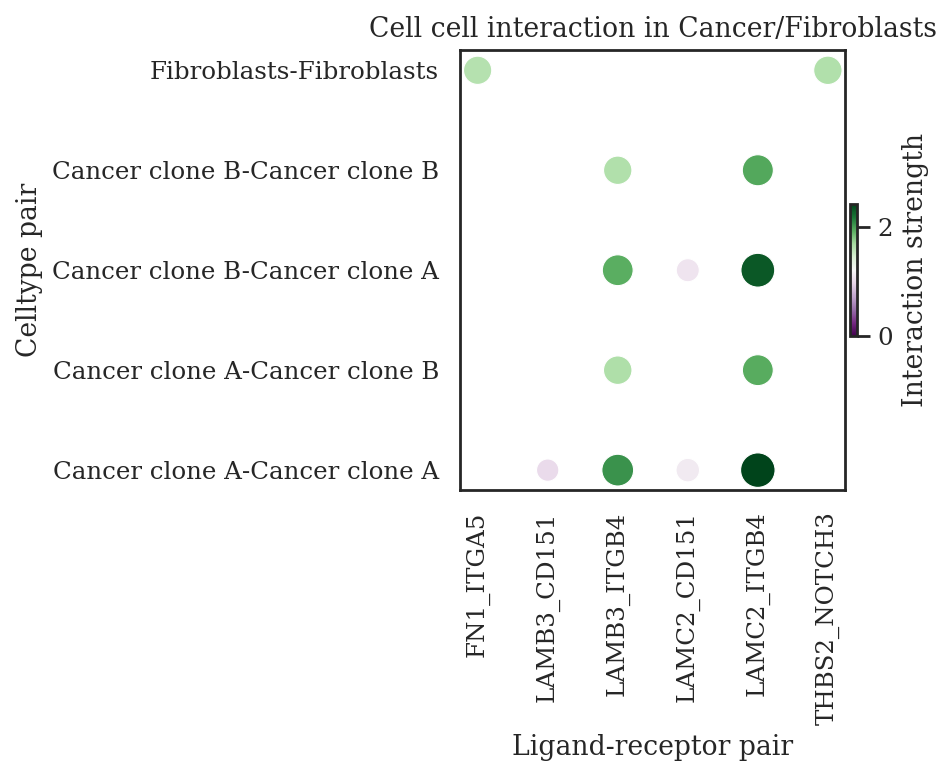

In [58]:
plt.figure(figsize=(6, 5))
group2_names = filtered_wide.index
group1_names = filtered_wide.columns

x, y = np.meshgrid(group1_names, group2_names)

x = x.flatten()
y = y.flatten()
exp_values = filtered_wide.values.flatten()
percent_values = filtered_wide.values.flatten()

scatter = plt.scatter(x, y, c=exp_values, s=percent_values*100, cmap='PRGn',
                       alpha=1, edgecolors="w", linewidth=0.5)

plt.colorbar(scatter, label='Interaction strength',pad=0.01,shrink=0.3)

# legend_sizes = [3,2,1.5,1,0]
# legend_sizes_scaled = [size * 50 for size in legend_sizes]
# legend_labels = ["P val < 1e-3",
#                  "P val < 1e-2",
#                  "P val < 5e-2",
#                  "P val < 1e-1",
#                  "P val > 1e-1",]

# for size, scaled_size, label in zip(legend_sizes, legend_sizes_scaled, legend_labels):
#     plt.scatter([], [], s=scaled_size, c='gray', alpha=0.7, edgecolors="w", label=label)

# plt.legend(title='P value', loc='center left', bbox_to_anchor=(1.01, 0.15), frameon=False)

plt.xlabel('Ligand-receptor pair')
plt.ylabel('Celltype pair')
plt.title('Cell cell interaction in Cancer/Fibroblasts')

plt.xticks(np.arange(len(group1_names)), group1_names, rotation=90)
plt.yticks(np.arange(len(group2_names)), group2_names)

plt.tight_layout()
plt.savefig("Figure/10_3_CCI_CF.pdf",dpi=300)
plt.show()